# Statistical Learning HW4: Dimensionality Reduction

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

### Load data and quick review of data

In [3]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [4]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
5,106,006,006032,國立政治大學,哲學系,2,藝術及人文,政大,哲學
6,106,006,006262,國立政治大學,英國語文學系,2,藝術及人文,政大,英國語文
7,106,006,006292,國立政治大學,日本語文學系,2,藝術及人文,政大,日本語文
8,106,006,006272,國立政治大學,阿拉伯語文學系,2,藝術及人文,政大,阿拉伯語文
9,106,006,006302,國立政治大學,韓國語文學系,2,藝術及人文,政大,韓國語文


## Question1: Data Preparation

In [5]:
def remove_col():
    global stu_adm
    co = stu_adm['department_id'].value_counts()
    rem_co = co[co < 10]
    keys = rem_co.keys()
    stu_adm = stu_adm[~stu_adm.department_id.isin(keys)]
    all_depid_copy = stu_adm['department_id'].unique()
    ndepid_copy = all_depid_copy.shape[0]
    
def remove_stu():
    global stu_adm
    co_s = stu_adm['student_id'].value_counts()
    rem_co_s = co_s[co_s < 2]
    if len(rem_co_s) > 0:
        keys_s = rem_co_s.keys()
        stu_adm = stu_adm[~stu_adm.student_id.isin(keys_s)]
        all_sid_copy = stu_adm['student_id'].unique()
        nsid_copy = all_sid_copy.shape[0]
        return True
    else:
        print("False")
        return False

### Q1.1: Report the number of academic department and student applicants in your dataset.

In [6]:
toContinue = True
while toContinue:
    remove_col()
    toContinue = remove_stu()

all_depid_final = stu_adm['department_id'].unique()
ndepid_final = all_depid_final.shape[0]
all_stuid_final = stu_adm['student_id'].unique()
nstuid_final = all_stuid_final.shape[0]
print("There are %d students and %d departments in total." % (nstuid_final, ndepid_final))

False
There are 47386 students and 1917 departments in total.


In [7]:
stu_adm['apply'] = 1
stu_adm.head(10)

,school_id,department_id,student_id,student_name,state,location1,location2,apply
0,001,001012,10246842,黃士玹,正1,南部,台南考區,1
1,001,001012,10042237,黃冠婷,正2,北部,台北考區,1
2,001,001012,10008031,鍾大方,正3,北部,台北考區,1
3,001,001012,10201525,曾信豪,正4,中部,彰化考區,1
4,001,001012,10014615,陳品儒,正5,北部,台北考區,1
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區,1
6,001,001012,10022810,吳悅慈,正7,北部,台北考區,1
7,001,001012,10236223,陳俞潔,正8,南部,台南考區,1
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區,1
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區,1


In [8]:
# sum up application numbers of each department
dum_df = stu_adm.pivot(index="department_id", columns="student_id", values="apply").fillna(0)
dum_df.head(10)

student_id,10000101,10000110,10000111,10000112,10000114,10000116,10000120,10000121,10000125,10000126,...,19710702,19710703,19710708,19710709,19770103,19810104,19810201,19810202,19840201,19950101
department_id,,,,,,,,,,,,,,,,,,,,,
001012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dum_df['appl_num'] = dum_df.sum(axis=1)
dum_df.head(10)

student_id,10000101,10000110,10000111,10000112,10000114,10000116,10000120,10000121,10000125,10000126,...,19710703,19710708,19710709,19770103,19810104,19810201,19810202,19840201,19950101,appl_num
department_id,,,,,,,,,,,,,,,,,,,,,
001012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
001032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
001042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
001052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
001062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0
001072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
001082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
001092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0


### Q1.2: Report the top ten departments that recieved the most applications and the number of applications they received. Identify the department by their department_id and names.

In [10]:
top_ten_id = list(dum_df.nlargest(10, 'appl_num').index)

In [11]:
print("number of applications/department id/department name:")
for dep_id in top_ten_id:
    dep = uname.loc[uname['department_id'] == dep_id, 'department_name']
    dep_str = dep.values[0]
    print(dum_df.loc[dep_id, "appl_num"], dep_id, dep_str)

# delete appl_num column
del dum_df['appl_num']

number of applications/department id/department name:
386.0 008122 機械工程學系
376.0 012052 藥學系
367.0 046032 會計學系（臺北校區）
357.0 004382 電機工程學系
353.0 005192 企業管理學系
353.0 008112 土木工程學系
351.0 005182 會計學系
340.0 015342 財務金融學系
339.0 045012 電機工程學系
329.0 015222 資訊工程學系


## Question2: Explore 

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.unicode_minus']=False

In [13]:
# setup plt revelent attributes 
label_color_map = {"1":"r", "2": "g", "3": "b", "4": "y", "5": "c", "6":"m",
                   "7":"k", "8":"pink", "9":"lime", "10":"peru", "99":"gray"}
category_dic = uname.set_index('category_id')['category_name'].to_dict()
label_color = []
dep_id_list = dum_df.index.tolist()
for i in range(len(dum_df)):
    dep_id = dep_id_list[i]
    category_id = uname.loc[uname['department_id'] == dep_id, 'category_id']
    category_id_str = category_id.values[0]
    label_color.append(label_color_map[category_id_str])

patchList = []
for key in category_dic:
        data_key = mpatches.Patch(color=label_color_map[key], label=category_dic[key])
        patchList.append(data_key)

### Q2.1: Principal Component Analysis (PCA)

In [15]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(dum_df)

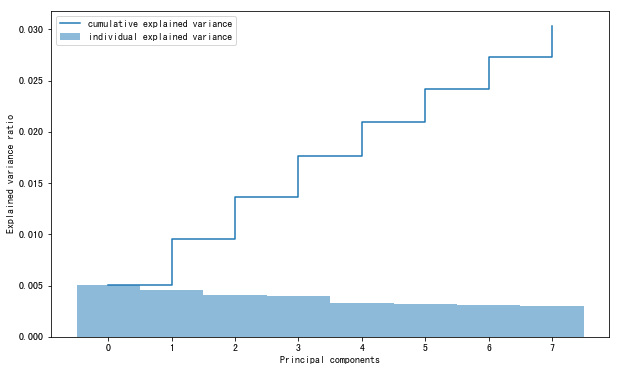

In [18]:
expl_ratios = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(expl_ratios)
plt.bar(range(len(expl_ratios)), expl_ratios, width=1.0, bottom=0.0, alpha=0.5, label='individual explained variance')
plt.step(range(len(expl_ratios)), cum_var_exp, where='post', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Text(0.5,1,'Using sklearn PCA')

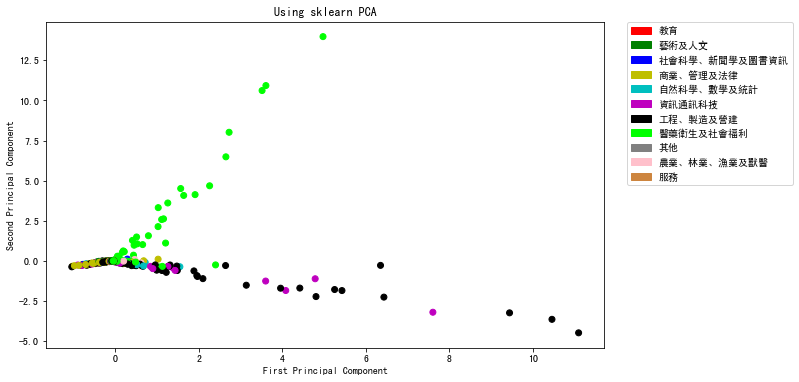

In [53]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Using sklearn PCA')

Text(0.5,1,'Using sklearn PCA')

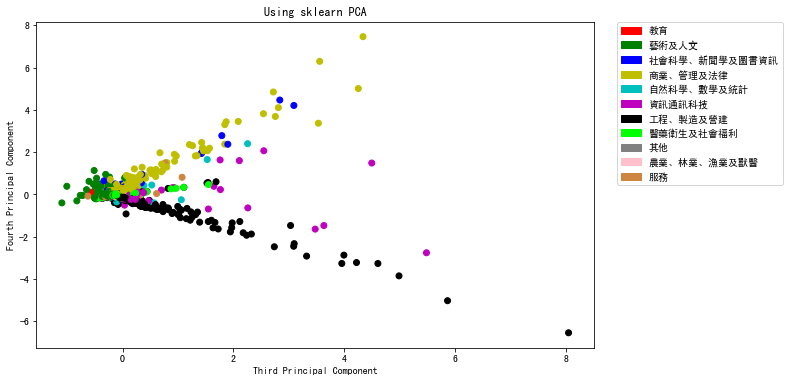

In [72]:
plt.scatter(pca_data[:,2], pca_data[:,3], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('Using sklearn PCA')

Text(0.5,1,'Using sklearn PCA')

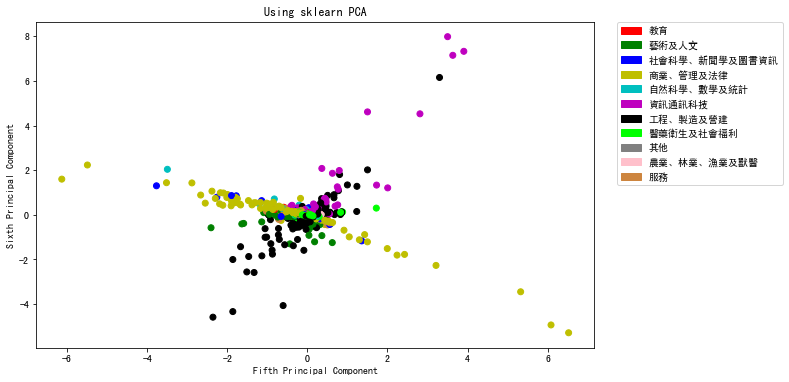

In [73]:
plt.scatter(pca_data[:,4], pca_data[:,5], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.xlabel('Fifth Principal Component')
plt.ylabel('Sixth Principal Component')
plt.title('Using sklearn PCA')

Text(0.5,1,'Using sklearn PCA')

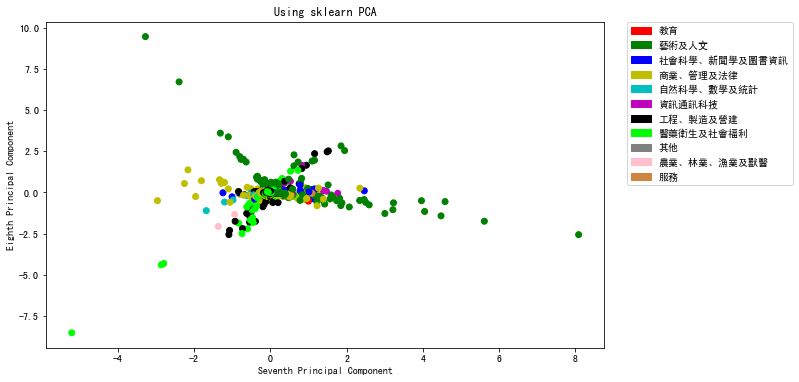

In [74]:
plt.scatter(pca_data[:,6], pca_data[:,7], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.xlabel('Seventh Principal Component')
plt.ylabel('Eighth Principal Component')
plt.title('Using sklearn PCA')

Text(0.5,1,'Using sklearn PCA')

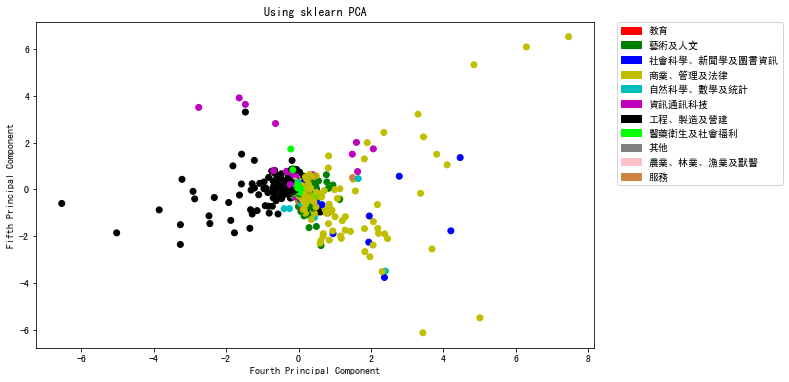

In [75]:
plt.scatter(pca_data[:,3], pca_data[:,4], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.xlabel('Fourth Principal Component')
plt.ylabel('Fifth Principal Component')
plt.title('Using sklearn PCA')

#### Q2.1 小結
   * 將八種成分兩兩配對畫出來，可發現有些類別可被清楚的區分出來
   * 使用主要成分一和二的圖中“醫療衛生及社會福利”類別清晰可見
   * 其他圖當中，最容易被辨認的類別為“商業、管理及法律”以及“工程、製造及營建”

### Q2.2: Multidimensional Scaling (MDS)

In [20]:
from sklearn.manifold import MDS

In [21]:
mds = MDS(metric=True) #n_components=8, 
mds_data = mds.fit_transform(dum_df)

Text(0.5,1,'Using sklearn MDS (metric)')

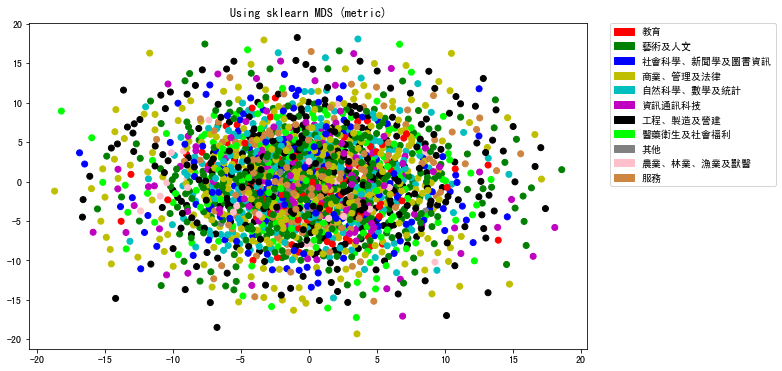

In [54]:
plt.scatter(mds_data[:,0], mds_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn MDS (metric)')

In [81]:
mds_nonMetric = MDS(metric=False) #n_components=8, 
mds_data_nonMetric = mds_nonMetric.fit_transform(dum_df)

Text(0.5,1,'Using sklearn MDS (non-metric)')

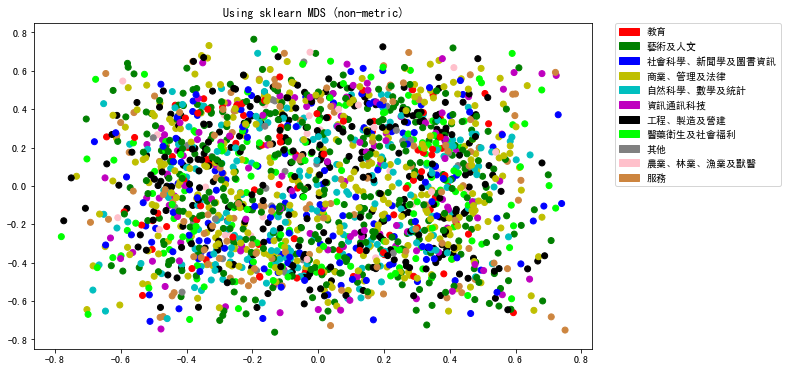

In [82]:
plt.scatter(mds_data_nonMetric[:,0], mds_data_nonMetric[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn MDS (non-metric)')

Q2.2 小結
   * metric=True的case資料點較集中，分佈成橢圓形
   * metric=False的case資料點較分散，沒有明顯的分佈
   * 兩者皆未清楚區分出學科類別

### Q2.3: Locally Linear Embedding (LLE)

In [26]:
from sklearn.manifold import LocallyLinearEmbedding

(1) Use 20 neighbors to construct the weight matrix

In [101]:
lle20 = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
lle20_data = lle20.fit_transform(dum_df)

Text(0.5,1,'Using sklearn LLE (20 neighbors)')

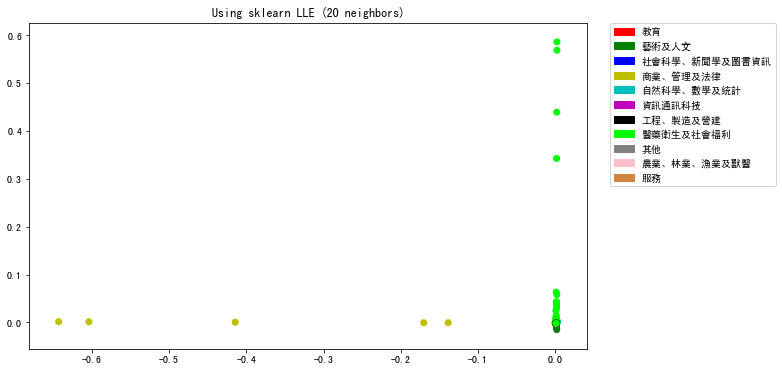

In [56]:
plt.scatter(lle20_data[:,0], lle20_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn LLE (20 neighbors)')

(2) Use 40 neighbors to construct the weight matrix

In [29]:
lle40 = LocallyLinearEmbedding(n_neighbors=40, n_components=2)
lle40_data = lle40.fit_transform(dum_df)

Text(0.5,1,'Using sklearn LLE (40 neighbors)')

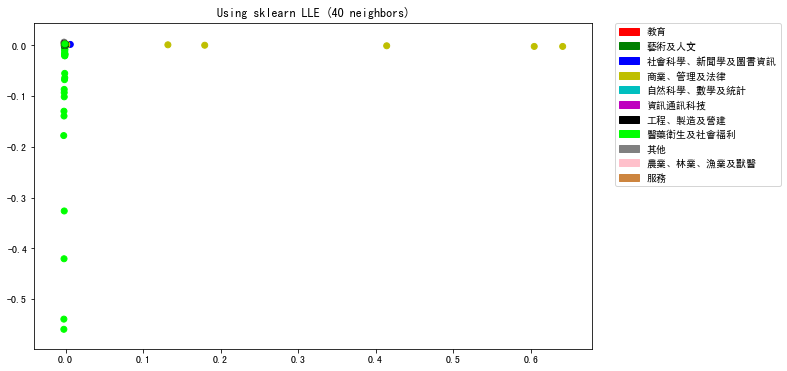

In [57]:
plt.scatter(lle40_data[:,0], lle40_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn LLE (40 neighbors)')

(3) Perform PCA transformation first, and use the first 100 principle components as the input to LLE (with 20 neighbors).

In [33]:
pca_100 = PCA(n_components=100)
pca_100_data = pca.fit_transform(dum_df)
lle_pca = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
lle_pca_data = lle_pca.fit_transform(pca_100_data)

Text(0.5,1,'Using sklearn LLE (20 neighbors) with data firstly transformed by PCA')

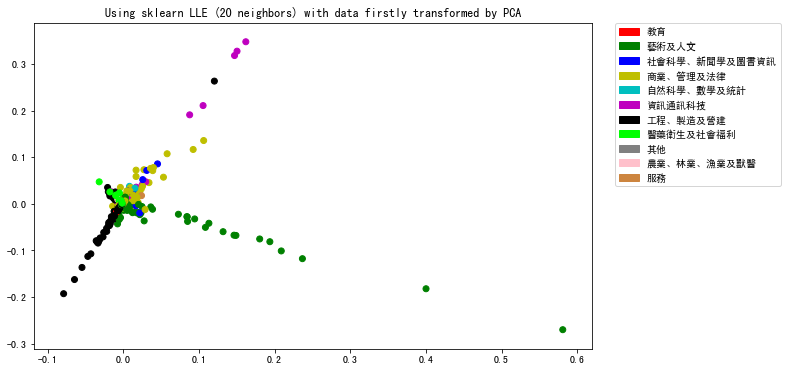

In [63]:
plt.scatter(lle_pca_data[:,0], lle_pca_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn LLE (20 neighbors) with data firstly transformed by PCA')

Q2.3小結
   * 使用原始資料，不論k設定為20或40，皆是部分的“商業、管理及法律”和“醫療衛生及社會福利”類別有被分類出來
   * 先使用PCA獲取降維後特徵，再使用LLE，除了運算速度加快許多，“工程、製造及營建”、”藝術及人文“和“商業、管理及法律”等類別較為清晰可見

### Q2.4: Kernel PCA

In [35]:
from sklearn.decomposition import KernelPCA

In [89]:
# RBF kernel
kpca = KernelPCA(kernel='rbf',gamma=15,n_components=2)
kpca_data = kpca.fit_transform(dum_df)

Text(0.5,1,'Using sklearn Kernel PCA with RBF kernel')

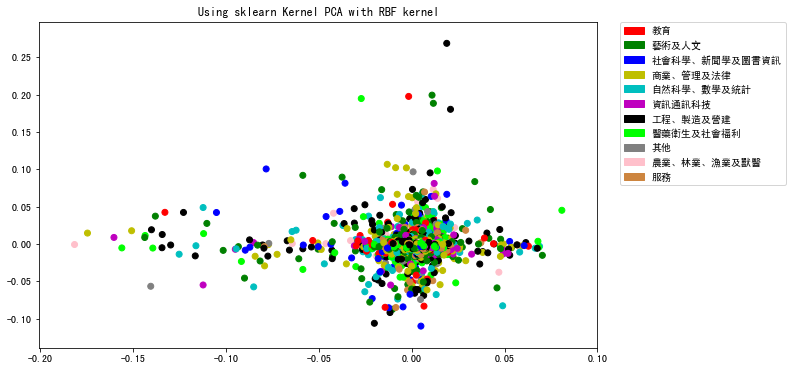

In [90]:
plt.scatter(kpca_data[:,0], kpca_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn Kernel PCA with RBF kernel')

In [91]:
# Cosine kernel
kpca_co = KernelPCA(kernel='cosine',gamma=15,n_components=2)
kpca_co_data = kpca_co.fit_transform(dum_df)

Text(0.5,1,'Using sklearn Kernel PCA with Cosine kernel')

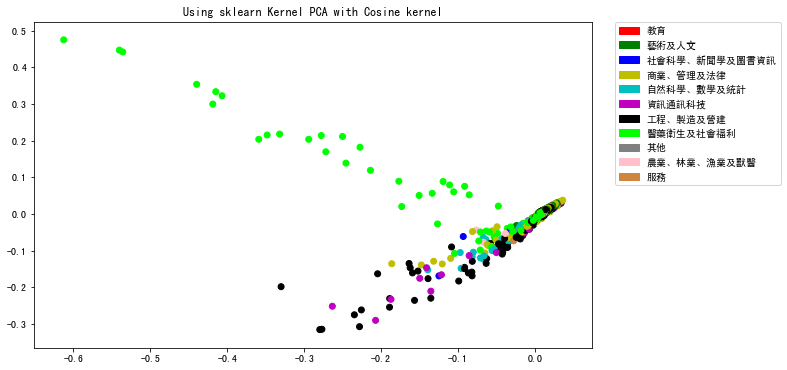

In [92]:
plt.scatter(kpca_co_data[:,0], kpca_co_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn Kernel PCA with Cosine kernel')

Q2.3小結
   * 套用gamma=0.05, 10, 15，以及kernel=rbg, cosine, sigmoid之不同組合，最後選用gamma=15搭配rbf, cosine kernel做運算
   * 可發現使用rbf kernel的分類並不清晰，而使用cosine kernel的運算結果有將“醫療衛生及社會福利”類別和其他區分開來

### Q2.4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [15]:
from sklearn.manifold import TSNE

In [16]:
rng = np.random.RandomState(1)

In [44]:
tsne_e = TSNE(metric = "euclidean", random_state=rng)
tsne_e_data = tsne_e.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using euclidean distance')

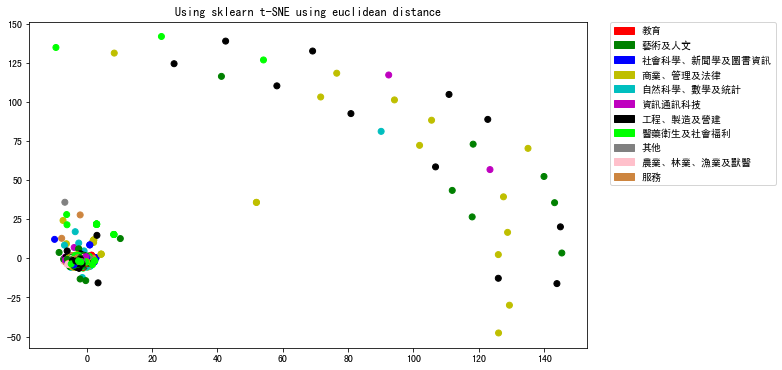

In [60]:
plt.scatter(tsne_e_data[:,0], tsne_e_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using euclidean distance')

In [46]:
tsne_c = TSNE(metric = "cosine", random_state=rng)
tsne_c_data = tsne_c.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using cosine distance')

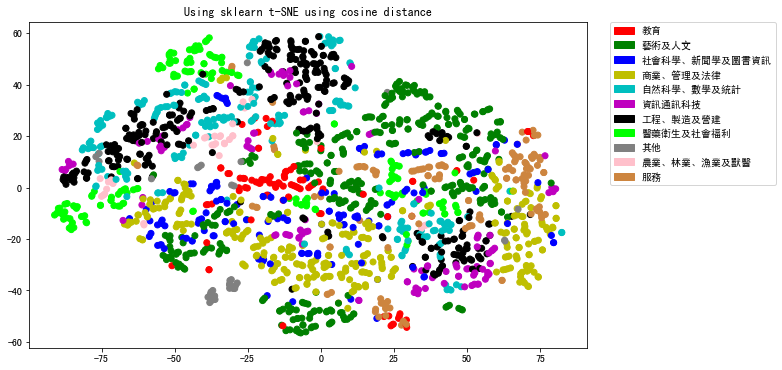

In [61]:
plt.scatter(tsne_c_data[:,0], tsne_c_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using cosine distance')

In [17]:
tsne_j = TSNE(metric = "jaccard", random_state=rng)
tsne_j_data = tsne_j.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using jaccard distance')

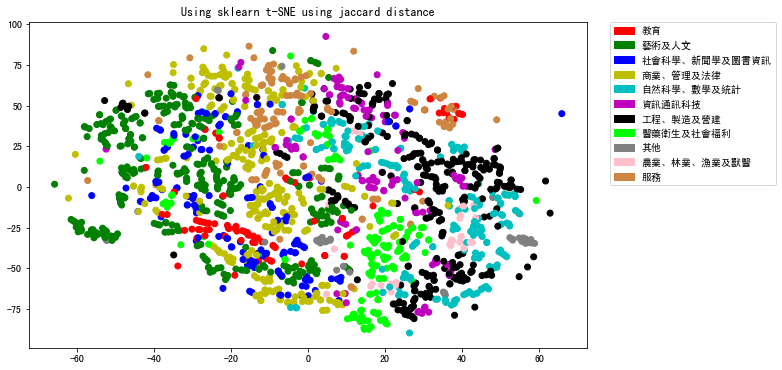

In [18]:
plt.scatter(tsne_j_data[:,0], tsne_j_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using jaccard distance')

Q2.4小結
   * 使用不同metric計算，差異顯著
   * 用歐式距離計算的分類結果並沒有顯著特徵
   * 使用cosine以及jaccard方法降維，可看出各學科類別有相對聚集的現象

## Question3: Refine

加入參數 init=pca

In [103]:
tsne_r = TSNE(metric = "cosine", init="pca", random_state=rng)
tsne_r_data = tsne_r.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using cosine distance')

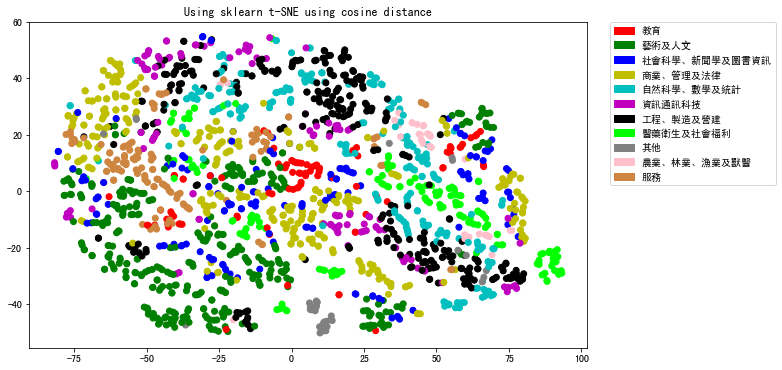

In [104]:
plt.scatter(tsne_r_data[:,0], tsne_r_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using cosine distance')

使用不同 random_state

In [105]:
tsne_r1 = TSNE(metric = "cosine", init="pca", random_state=33)
tsne_r1_data = tsne_r1.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using cosine distance')

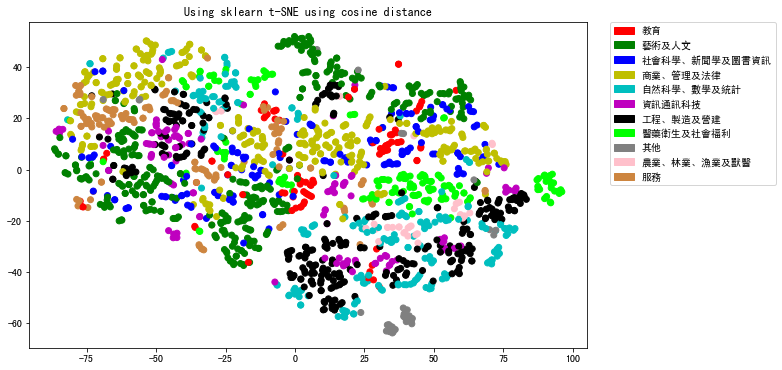

In [106]:
plt.scatter(tsne_r1_data[:,0], tsne_r1_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using cosine distance')

加入參數learning_rate=100，先前default=200

In [107]:
tsne_r2 = TSNE(metric = "cosine", random_state=rng, learning_rate=100)
tsne_r2_data = tsne_r2.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using jaccard distance')

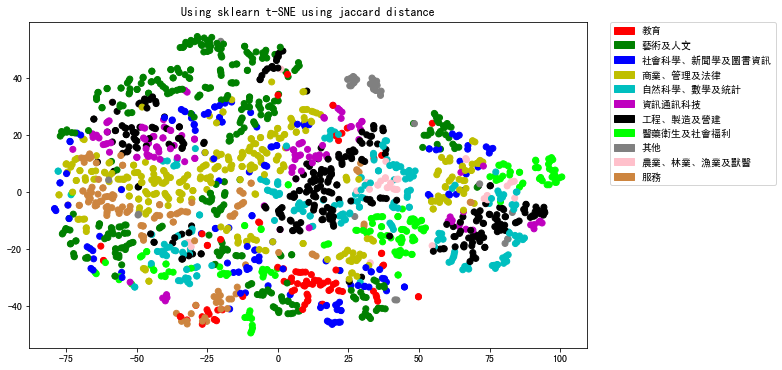

In [108]:
plt.scatter(tsne_r2_data[:,0], tsne_r2_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using cosine distance')

使用jaccard，並設定learning_rate=100

In [111]:
tsne_r3 = TSNE(metric = "jaccard", random_state=rng, learning_rate=100)
tsne_r3_data = tsne_r3.fit_transform(dum_df)

Text(0.5,1,'Using sklearn t-SNE using cosine distance')

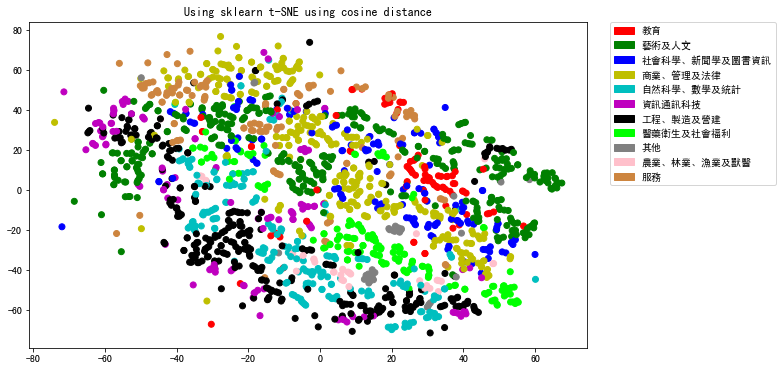

In [112]:
plt.scatter(tsne_r3_data[:,0], tsne_r3_data[:,1], c=label_color)
plt.legend(handles=patchList, bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)
plt.title('Using sklearn t-SNE using cosine distance')

### Color points by department category with label and save the image

In [19]:
dep_names = []
for i in range(len(dum_df)):
    dep_id = dep_id_list[i]
    dep_name = uname.loc[uname['department_id'] == dep_id, 'department_name']
    dep_name_str = dep_name.values[0]
    dep_names.append(dep_name_str)

In [22]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [60, 36]

In [2]:
# NOTE: your could get labeled image by undo comment following code

# for i in range(len(tsne_j_data)):
#     x = tsne_j_data[i][0]
#     y = tsne_j_data[i][1]
#     plt.scatter(x, y, c=label_color[i])
#     plt.text(x+0.1, y+0.1, dep_names[i], fontsize=4)
    
# plt.savefig('plot123_2.png')
# print("get image")